In [1]:
import numpy as np
import copy

In [2]:
def Sigmoid(x):
    res = 1 / (1 + np.exp(-x))
    return res

def d_Sigmoid(x):
    y = Sigmoid(x) * (1 - Sigmoid(x))
    return y

def ReLU(x):
    x = np.maximum(0, x)
    return x
    
def d_ReLU(x):
    y=x.copy()
    y[y<=0] = 0
    y[y>0] = 1
    return y


def Linear(x):
    return x

def d_Linear(x):
    y = np.ones(shape=(x.shape), dtype = x.dtype)
    return y

activations_dict = {
'Sigmoid': [Sigmoid, d_Sigmoid],
'ReLU': [ReLU, d_ReLU], 
'Linear': [Linear, d_Linear]
}


## input layer

In [3]:

class input_layer:
    def __init__(s, size):
        s.size = size
        #s.values = np.zeros(shape=(size), dtype = float)
    
    def add_neuron(s):
        #add_v = np.zeros(shape=(n_of_neurons), dtype=float)
        #s.values = np.concatenate((s.values, add_v.T))
        s.size += 1

    def delete_neuron(s, neuron_number):
        s.size-=1
        
    def delete_new_prev_size(s):     
        return


    def add_new_prev_size(s):     
        return

        
    def print_info(s):
        print("IN LAYER\nsize: ", s.size)

    
    def print_pic(s):
        print_size = min(2, s.size)

        for i in range(print_size): 
            print("| |\t", end='')
        print("")
        for i in range(print_size):
            print(" v \t", end='')
        print("")
        for i in range(print_size):
            print(' @\t', end='')
        print ("--", format(s.size, ' 5d') , "--\t", end='')

    def forward(s, x, to_print = False):
        s.values = x
        return x
        
    def forward_nu(s, x):
        return x

    def get_info(s):
        return s.size

## layers

In [4]:
class layer:
    def __init__(s, lr = 0.1, prev_size = 2, my_size=2, activation_type = "Sigmoid", weights = None, bias = None):
        s.lr = lr
        s.size = my_size
        s.prev_size = prev_size
        if (np.all(weights == None)):
            # s.weights = np.random.random((prev_size, s.size))
            s.w = np.random.random((s.size, prev_size))
        else:
            s.w = weights.copy()
            
        if (np.all(bias == None)):
            s.b = np.random.random((s.size, 1))
        else:
            s.b = bias.copy()
            
        s.activation_type = activation_type
        funcs = activations_dict.get(activation_type)
        s.activation_f = funcs[0]
        s.d_activation_f = funcs[1]
        
        s.Vdw = np.zeros(shape=(s.size, prev_size))
        s.Vdb = np.zeros(shape=(s.size, 1))
        
        s.Sdw = np.zeros(shape=(s.size, prev_size))
        s.Sdb = np.zeros(shape=(s.size, 1))
        s.t = 1
        s.epsilon = 1e-5


    def activate(s, x):
        return s.activation_f(x)
        
    def d_activate(s, x):
        return s.d_activation_f(x)  

    
    def forward(s, x, to_print = False):
        s.x = np.asarray(x)
        s.z = np.dot(s.w, s.x) + s.b
        
        if (to_print): 
            print('wT * x + b', s.z)

        s.a = s.activate(s.z)

        if (to_print): 
            print('s.a ',s.a)
            
        return s.a

    def backprop(s, da):
        s.dz = da * s.d_activate(s.z)
        s.da_ = np.dot(s.w.T, s.dz) 

        
        return s.da_
        
    def update_weights(s, optimizer = "SGD", beta1 = 0.9, beta2 = 0.999):
        
        m = s.x.shape[1]
        if (optimizer == "SGD"):
            
            s.dw = (1/m)*np.dot(s.dz, s.x.T)
            s.db = (1/m)*np.sum(s.dz, axis = 1, keepdims = True)
    
            s.w = s.w - s.lr * s.dw
            s.b = s.b - s.lr * s.db
            
        elif (optimizer=="SGDwM"):

            s.dw = (1/m)*np.dot(s.dz, s.x.T)
            s.db = (1/m)*np.sum(s.dz, axis = 1, keepdims = True)

            
            s.Vdw = beta1 * s.Vdw + (1 - beta1)*s.dw
            s.Vdb = beta1 * s.Vdb + (1 - beta1)*s.db
            
            s.w = s.w - s.lr * s.Vdw
            s.b = s.b - s.lr * s.Vdb
            
        elif (optimizer=="RMSProp"):

            s.dw = (1/m)*np.dot(s.dz, s.x.T)
            s.db = (1/m)*np.sum(s.dz, axis = 1, keepdims = True)

            s.Sdw = beta2 * s.Sdw + (1-beta2) * np.square(s.dw)
            s.Sdb = beta2 * s.Sdb + (1-beta2) * np.square(s.db)
            
            s.w = s.w - s.lr * s.dw / (np.sqrt(s.Sdw))
            s.b = s.b - s.lr * s.db / (np.sqrt(s.Sdb))
            
        elif (optimizer=="Adam"):

            s.dw = (1/m)*np.dot(s.dz, s.x.T)
            s.db = (1/m)*np.sum(s.dz, axis = 1, keepdims = True)
            
            s.Vdw = beta1 * s.Vdw + (1 - beta1)*s.dw
            s.Vdb = beta1 * s.Vdb + (1 - beta1)*s.db
            
            s.Sdw = beta2 * s.Sdw + (1-beta2) * np.square(s.dw)
            s.Sdb = beta2 * s.Sdb + (1-beta2) * np.square(s.db)

            # correct

            s.Vdw_ = s.Vdw / (1 - beta1**s.t)
            s.Vdb_ = s.Vdb / (1 - beta1**s.t)
            s.Sdw_ = s.Sdw / (1 - beta2**s.t)
            s.Sdb_ = s.Sdb / (1 - beta2**s.t)
            
            s.w = s.w - s.lr * s.Vdw_ / (np.sqrt(s.Sdw_) + s.epsilon)
            s.b = s.b - s.lr * s.Vdb_ / (np.sqrt(s.Sdb_)  + s.epsilon)
            s.t += 1
        else:
            print("NO SUCH OPTIMIZER!")
            return




   
            
        
    def print_info(s):
        print("my size: ", s.size)
        print("w: ", s.weights, "\n")
        print("b: ", s.bias, "\n")

              
    def print_pic(s):
        print_size = min(2, s.size)
        print("\n╻...\nv...")
        for i in range(print_size):
            print('O\t', end='')
        print ("--", format(s.size, ' 5d') , "--\t", end='')



    def correct_prev_size(s, new_prev_szie):
        dif = new_prev_szie - s.prev_size
        if dif > 0: # new prev is greater
            for i in range(dif):
                s.add_new_prev_size()
        elif dif < 0:
            dif*=-1
            for i in range(dif):
                s.delete_new_prev_size()
        s.prev_size = new_prev_szie


    def delete_neuron(s, neuron_number):
        s.weights = np.delete(s.weights, neuron_number, axis = 1)
        s.bias = np.delete(s.bias, neuron_number, axis = 0)
        s.size-=1
        
    def delete_new_prev_size(s):     
        s.weights = np.delete(s.weights, 0, axis = 0)
        s.prev_size -=1


    def add_neuron(s):     
        add_w = np.zeros(shape=(s.prev_size, 1), dtype=float) + 0.1 # np.random.random((s.prev_size, n_of_neurons)) #
        s.weights = np.concatenate((s.weights.T, add_w.T)).T
        add_b = np.zeros(shape=(1), dtype=float) + 0.1 
        s.bias = np.concatenate((s.bias, add_b))
        s.size+=1

    def add_new_prev_size(s):     
        add_w = np.zeros(shape=(1, s.size), dtype=float) + 0.1
        s.weights = np.concatenate((s.weights, add_w))
        s.prev_size += 1

    def get_info(s):
        return s.prev_size, s.size, s.weights, s.bias, s.activation_type, s.lr


        
        


## plastic nn

In [5]:

class plastic_nn:
    def __init__(s, optimizer = "SGD", beta = 0.9):

        opt_list = ['SGD', 'SGDwM', 'RMSProp', 'Adam']
        if optimizer in opt_list:
            s.optimizer = optimizer
        else:
            print('no such optimizer, available are: ')
            for each in opt_list:
                print(each)
            return
        
        s.layers = []
            
        s.n_of_layers = 0
        s.name = 'noname'
        s.optimizer = optimizer
        
        s.beta = beta
        pass

    def give_name(s, name):
        s.name = name
        
    def set_num_of_layers(s, num):
        s.n_of_layers = num
        
    def deep_copy(s):
        return copy.deepcopy(s)

    
    def forward(s, x, to_print = False):
        for lay in s.layers:
            x = lay.forward(x, to_print)
        s.last_result = x
        return s.last_result
        
    def forward_print(s, x, to_print = False):
        print('in: ',data)
        cnt = 0
        for lay in s.layers:
            x = lay.forward(x, to_print)
            print(cnt, ' ', x)
            cnt+=1
        s.last_result = x
        return s.last_result



    
    def backprop(s, correct):
        m = correct.shape[1]
        err = (1/m)*(s.last_result - correct) # a - y
        cnt = 0
        for lay in reversed(s.layers[1:]):
            #print(cnt)
            err = lay.backprop(err)
            cnt+=1

    def backprop_error(s, err):
        for lay in reversed(s.layers[1:]):
            err = lay.backprop(err)

    def update(s):
        i = 0
        for lay in reversed(s.layers[1:]):
            #print('layer idx: ', i)
            i+=1
            lay.update_weights(s.optimizer,s.beta)
            #print('\n')


    
    def learn_one(s, in_data, target_data):
        s.forward(in_data)
        s.backprop(target_data)
        s.update()   



    
    def append_one(s, new_layer, check = False):
        if check and s.n_of_layers!=0:
            last_layer_size = s.layers[-1].size
            if last_layer_size != new_layer.prev_size:
                print("size not match, layer ", s.n_of_layers)
                return
        s.layers.append(new_layer)
        s.n_of_layers+=1
        return

    def check_layers_sizes(s, check_layers):
        for i in range(1, len(check_layers)):
            if (check_layers[i-1].size != check_layers[i].prev_size):
                print("error between ", i-1, "and ", i)
                return False
        return True

    
    def append_layers(s, new_layers):
        test_layers = np.array([])
        if s.n_of_layers != 0: # if has layers
            test_layers = s.layers[-1] # get last layers
        
        test_layers = np.append(test_layers, new_layers) 
                
        if (s.check_layers_sizes(test_layers)):
            for lay in new_layers:
                s.append_one(lay)
            print("added LAYERS succesfully")
            return True
        else:
            print("ERROR adding layers, check info above")
            return False

    def add_layer_by_pos(s, pos, new_layer):
        if (pos <= 0 or pos > s.n_of_layers): # if input or more than 'to last'
            print("ERROR addning layer: invalid layer number!")
            if (pos == 0):
                print("input layer cannot be replaced by different layer")
            return
            
        if (pos == s.n_of_layers): # if add to the last
            s.append(new_layer)
            return
            
        if (new_layer.prev_size!=s.layers[pos-1].size):
            print("ERROR addning layer: invalid prev_size!")
            return 
            
        s.layers.insert(pos, new_layer)
        prev_size = new_layer.size
        
        # update next layer prev_size and w matrix
        next_lay = s.layers[pos+1]
        next_lay.correct_prev_size(prev_size)
        s.n_of_layers += 1

    def delete_layer_by_pos(s, pos):
        if (pos <= 0 or pos >= s.n_of_layers): # if input or more than 'to last'
            print("ERROR deleting layer: invalid layer number!")
            if (pos == 0):
                print("input layer cannot be deleted")
            return
        
        new_prev_size = s.layers[pos].prev_size 
        if (pos != s.n_of_layers-1): #if not last
            next_lay = s.layers[pos+1]
            next_lay.correct_prev_size(new_prev_size)

        del s.layers[pos]
        s.n_of_layers -= 1


    def add_neuron(s, layer_number, n_of_neurons = 1):
        if (layer_number < 0 or layer_number>= s.n_of_layers):
            print("ERROR addning neuron: invalid layer number!")
            return
        
        main_lay = s.layers[layer_number]  
        
        for i in range(n_of_neurons):
            main_lay.add_neuron()           
            if (layer_number+1 != s.n_of_layers): # if main is not last
                # update next layer prev_size and w matrix
                next_lay = s.layers[layer_number+1]
                next_lay.add_new_prev_size()
    
    def delete_neuron(s, layer_number, neuron_number):
        if (layer_number < 0 or layer_number>= s.n_of_layers):
            print("ERROR deleting neuron: invalid layer number!")
            return
            
        main_lay = s.layers[layer_number] 
        
        if (neuron_number >= main_lay.size):
            print("ERROR deleting neuron: invalid neuron number!")
            return

        main_lay.delete_neuron(neuron_number)
        if (layer_number+1 != s.n_of_layers): # if main is not last
                # update next layer prev_size and w matrix
                next_lay = s.layers[layer_number+1]
                next_lay.delete_new_prev_size()
        
        

    
    def print_info(s):
        print('NAME: ', s.name, ' (', s.n_of_layers, ')')
        for cnt in range(s.n_of_layers):
            print("#", cnt)
            s.layers[cnt].print_info()
            print("")
    
    def print_pic(s):
        print('NAME: ', s.name, ' (', s.n_of_layers, ')')
        cnt = 0
        for lay in s.layers:
            lay.print_pic()
            print("#", cnt, end='')
            cnt+=1
        print("\nOUT |#|\nOUT  v")

    
    def save(s, file_path):       
        f = open(file_path, "w").close()
        
        f = open(file_path, "a")       
        f.write("{}\n{}\n".format(s.name, s.n_of_layers))       
        input_layer_size = s.layers[0].get_info()
        f.write("{}\n".format(input_layer_size))

        for lay in s.layers[1:]:            
            prev_size, size, weights, bias, activation_type, lr = lay.get_info()
            f.write("{}\n".format(prev_size))
            f.write("{}\n".format(size))
            
            np.savetxt(f, weights)#, fmt='%f')
            np.savetxt(f, bias)#, fmt='%f')
            f.write("{}\n".format(activation_type))
            f.write("{}\n".format(lr))
                 
        f.close()

        
    def load(s, file_path):
        s.layers = None
        s.layers = []
        s.n_of_layers = 0       
        layers = []
        f = open(file_path, "r")       
        name = f.readline().split()[0]
        total_n_of_layers = int(f.readline().split()[0])
        input_layer_size = int(f.readline().split()[0])

        in_layer = input_layer(input_layer_size)
        layers.append(in_layer)
        
        s.give_name(name)

        for i in range(total_n_of_layers-1):
            prev_size = int(f.readline().split()[0])
            size = int(f.readline().split()[0])
            weights = np.loadtxt(f, max_rows = prev_size)
            bias = np.loadtxt(f, max_rows = size)
            activation_type = f.readline().split()[0]
            lr = float(f.readline().split()[0])

            layers.append(layer(lr = lr, prev_size= prev_size, my_size = size, 
                                activation_type = activation_type, weights = weights, bias = bias))
            
        s.append(layers)             
        f.close()






In [6]:
output_size = 5
input_size = 3


m = 1
x = np.random.random((input_size, m))
print(x.shape)
target =  np.ones((output_size, m))
print('t', target)

w = np.random.random((output_size, input_size))
print('w', w)

b = np.random.random((output_size, 1))
#print(b)

z = np.dot(w, x) + b
print('z', z)

a = Sigmoid(z)
print('a', a)
last_res = a



s = target.shape[1] 
err = (1/s) * (last_res - target)
print('e', err)

dz = err * d_Sigmoid(z)
print('dz', dz)

# dw = dz*x.T
dw = (1/s)*np.dot(dz, x.T)
print('dw', dw)

db = (1/s) * np.sum(dz, axis = 1, keepdims = True)
print('db', db)

da_ = np.dot(w.T, dz) 
print('da_', da_)

(3, 1)
t [[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
w [[0.38792418 0.22965719 0.52182861]
 [0.24265561 0.75408313 0.98589802]
 [0.12233793 0.10772141 0.22092405]
 [0.59690535 0.13030681 0.17487545]
 [0.38508541 0.81753192 0.24169649]]
z [[0.77192781]
 [2.05825898]
 [0.52577949]
 [0.45789035]
 [1.14173355]]
a [[0.68393777]
 [0.88677949]
 [0.62849821]
 [0.61251359]
 [0.75799778]]
e [[-0.31606223]
 [-0.11322051]
 [-0.37150179]
 [-0.38748641]
 [-0.24200222]]
dz [[-0.06832219]
 [-0.01136752]
 [-0.08674129]
 [-0.09196629]
 [-0.0443922 ]]
dw [[-0.01817616 -0.06494841 -0.05320748]
 [-0.00302417 -0.01080619 -0.00885272]
 [-0.0230763  -0.08245797 -0.06755177]
 [-0.02446634 -0.08742496 -0.07162087]
 [-0.01180992 -0.04220009 -0.03457144]]
db [[-0.06832219]
 [-0.01136752]
 [-0.08674129]
 [-0.09196629]
 [-0.0443922 ]]
da_ [[-0.11186393]
 [-0.08188251]
 [-0.09283502]]


# test

In [7]:
import numpy as np
from matplotlib import pyplot as plt

added LAYERS succesfully


Text(0, 0.5, 'error')

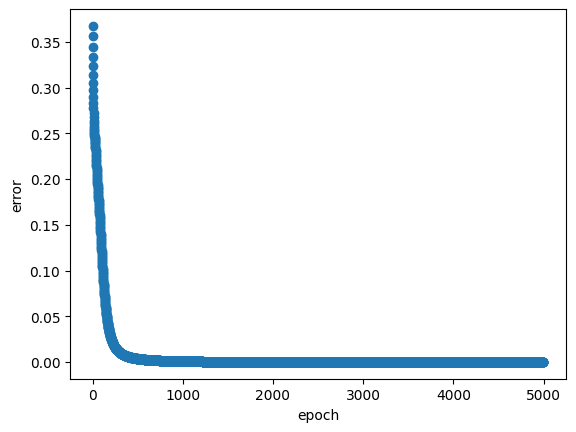

In [8]:
import math

#np.random.seed(5)

train_size = 512
data_x_offset = 20
data_y_offset = 20
in_data = [] 
target_data = []
for i in range(train_size):
    theta = np.random.random() * 2 * math.pi
    radius = np.random.rand() * 0.3
    if (i < train_size/4):
        in_data.append([0 + radius*math.cos(theta), 0 + radius*math.sin(theta) ])
        target_data.append([0])
    elif (i < 2*train_size/4):
        in_data.append([1 + radius*math.cos(theta), 1 + radius*math.sin(theta) ])
        target_data.append([0])
    elif(i < 3*train_size/4):
        in_data.append([ 1 + radius*math.cos(theta), 0 + radius*math.sin(theta) ])
        target_data.append([1])
    else:
        in_data.append([ 0 + radius*math.cos(theta), 1 + radius*math.sin(theta) ])
        target_data.append([1])

test_size = round(train_size*0.2)
in_test_data = [] 
target_test_data = []
for i in range(test_size):
    theta = np.random.random() * 2 * math.pi
    radius = np.random.rand() * 0.3
    if (i < test_size/4):
        in_test_data.append([0 + radius*math.cos(theta), 0 + radius*math.sin(theta) ])
        target_test_data.append([0])
    elif (i < 2*test_size/4):
        in_test_data.append([1 + radius*math.cos(theta), 1 + radius*math.sin(theta) ])
        target_test_data.append([0])
    elif(i < 3*test_size/4):
        in_test_data.append([ 1 + radius*math.cos(theta), 0 + radius*math.sin(theta) ])
        target_test_data.append([1])
    else:
        in_test_data.append([ 0 + radius*math.cos(theta), 1 + radius*math.sin(theta) ])
        target_test_data.append([1])

# plt.figure()
# plt.scatter(np.array(in_data)[:, 0], np.array(in_data)[:, 1], c = target_data)
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title("training data")

# plt.figure()
# plt.scatter(np.array(in_test_data)[:, 0], np.array(in_test_data)[:, 1], c = target_test_data)
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title("validation data")


in_layer = input_layer(2)
tl = layer(lr = 0.001, prev_size = 2, my_size=2, activation_type="ReLU")#, optimizer = 'SGD', beta = 0.8)
out_layer = layer(lr = 0.001, prev_size = 2, my_size=1, activation_type="Sigmoid")#, optimizer = 'SGD', beta = 0.6)

test_nn = plastic_nn("Adam")
layers = [in_layer, tl, out_layer]

test_nn.append_layers(layers)



to_display_bar = True

graph_err = []
graph_epoch=[]
epochs = 5000
target_data = np.array(target_data)
#print(target_data)

bar_len = 50

def display_bar(bar_len, idx, total):
    idx = int(idx*bar_len/total)
    #print(perc)
    print("[", "-"*idx, "*", "-"*(bar_len-idx-1), "]", end='')
    print("\r",end='')
    
in_data = np.asarray(in_data)
minibatch_size = 16

def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

in_data, target_data = unison_shuffled_copies(in_data, target_data)
for i in range(epochs):
    if to_display_bar:
        display_bar(bar_len, i, epochs)

    for idx in range(int(len(in_data)/minibatch_size)):     
        x = np.asarray(in_data[idx*minibatch_size:(idx+1)*minibatch_size])
        y = np.asarray(target_data[idx*minibatch_size:(idx+1)*minibatch_size])
        test_nn.learn_one(x.T, y.T)

    error_sum = 0
    for idx in range(len(in_test_data)):#1):#
        y = np.asarray(in_test_data[idx])
        y = y.reshape(y.shape[0], 1)
        valid_res = test_nn.forward(y)
        error = (target_test_data[idx] - valid_res)**2
        error_sum+=error
    
    graph_err.append(error_sum/len(in_test_data))
    graph_epoch.append(i)

plt.figure()
plt.scatter(graph_epoch, graph_err)
plt.xlabel('epoch')
plt.ylabel('error')


In [9]:
test_2_in = [[0, 0], [0,1], [1, 0], [1, 1],
            [0.2, 0.1], [-0.1, 1], [1.1, -0.1], [1.2, 1.1]]
test_2_in = np.asarray(test_2_in)
print(test_2_in.shape)
for i in range(len(test_2_in)):
    y = test_2_in[i]
    y = y.reshape(y.shape[0], 1)
    print(test_nn.forward(y))

(8, 2)
[[1.57946337e-08]]
[[1.]]
[[0.9979825]]
[[2.41525893e-08]]
[[5.02684001e-07]]
[[1.]]
[[0.9979825]]
[[7.68686211e-07]]


In [10]:
test_2_in = [[0, 0], [0,1], [1, 0], [1, 1],
            [0.2, 0.1], [-0.1, 1], [1.1, -0.1], [1.2, 1.1]]
test_2_in = np.asarray(test_2_in)
print(test_2_in.shape)
for i in range(len(test_2_in)):
    y = test_2_in[i]
    y = y.reshape(y.shape[0], 1)
    print(test_nn.forward(y))

(8, 2)
[[1.57946337e-08]]
[[1.]]
[[0.9979825]]
[[2.41525893e-08]]
[[5.02684001e-07]]
[[1.]]
[[0.9979825]]
[[7.68686211e-07]]
